<a href="https://colab.research.google.com/github/PetrovES570/PDA_SOL/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%A3%D0%BF%D1%80%D0%B0%D0%B6%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_2_%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%95%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 2. Источники данных. Извлечение данных
# Упражнение 2

ФИО: Петров Евгений Семенович

Группа: БД-231м

## Задание 2.3. Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы

[Сведения о свободных нежилых помещениях, предполагаемых к предоставлению в аренду, расположенных на территории бизнес-инкубаторов, технопарков города Москвы](https://data.mos.ru/opendata/3367?objectId=724343626&pageSize=10&pageIndex=0)

In [ ]:
# Импорт стандартных пакетов
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint
from bs4 import BeautifulSoup as bso

# Для выполнения операций с регулярными выражениями
import re

In [ ]:
import requests

url = 'https://apidata.mos.ru/v1/datasets/3367/features?api_key=22de8170-185c-4df6-a56e-1fe3dd1bdab4'
headers = {'Accept': 'application/json'}

response = requests.get(url, headers=headers)

In [ ]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/3367/features?api_key=22de8170-185c-4df6-a56e-1fe3dd1bdab4


In [ ]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


In [ ]:
if response.status_code == 200:
    json_data = response.json()  # Преобразуем JSON-ответ в словарь Python

    features = json_data['features']

    # Создаем датафрейм из полученных данных
    df = pd.json_normalize(features)
else:
    print('Запрос вернул статус:', response.status_code)

In [ ]:
df

,geometry,type,properties.datasetId,properties.attributes.global_id,properties.attributes.is_deleted,properties.attributes.TechnoparkName,properties.attributes.TotalConstructionArea,properties.attributes.UnoccupiedProductionArea,properties.attributes.UnoccupiedOfficeArea,properties.attributes.UnoccupiedStorageArea,properties.attributes.UnoccupiedCleanRooms,properties.attributes.TotalUnoccupiedArea,properties.attributes.Note,properties.rowId,properties.versionNumber,properties.releaseNumber
0,None,Feature,3367,724343070,0,Технопарк «Агат»,76762.0,0,0.0,0.0,0,0.0,,None,1,26
1,None,Feature,3367,724343343,0,Технопарк «ИТЭЛМА»,81368.0,0,0.0,0.0,0,0.0,,None,1,26
2,None,Feature,3367,724343411,0,Технопарк «Красносельский»,12025.5,0,0.0,0.0,0,0.0,,None,1,26
3,None,Feature,3367,724343458,0,Технопарк «Курчатовский институт»,467454.0,0,0.0,0.0,0,0.0,,None,1,26
4,None,Feature,3367,724343476,0,Технопарк «Модуль»,14583.4,0,0.0,0.0,0,0.0,,None,1,26
5,None,Feature,3367,724343515,0,Технопарк «Мосгормаш»,33533.5,0,0.0,0.0,0,0.0,,None,1,26
6,None,Feature,3367,724343541,0,Технопарк «Нагатино»,19389.7,0,0.0,0.0,0,0.0,,None,1,26
7,None,Feature,3367,724343563,0,Технопарк Научный парк МГУ,11000.0,0,27.0,0.0,0,27.0,,None,1,26
8,None,Feature,3367,724343612,0,Технопарк «НИИССУ»,16713.1,0,0.0,0.0,0,0.0,,None,1,26
9,None,Feature,3367,724343626,0,Технопарк «Отрадное»,96485.0,0,2477.4,128.7,0,2606.1,,None,1,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   geometry                                        0 non-null      object 
 1   type                                            32 non-null     object 
 2   properties.datasetId                            32 non-null     int64  
 3   properties.attributes.global_id                 32 non-null     int64  
 4   properties.attributes.is_deleted                32 non-null     int64  
 5   properties.attributes.TechnoparkName            32 non-null     object 
 6   properties.attributes.TotalConstructionArea     32 non-null     float64
 7   properties.attributes.UnoccupiedProductionArea  32 non-null     int64  
 8   properties.attributes.UnoccupiedOfficeArea      32 non-null     float64
 9   properties.attributes.UnoccupiedStorageArea  

In [ ]:
df = df.drop(columns=df.columns[:3])
df = df.iloc[:, :-4]

In [ ]:
df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   global_id                 32 non-null     int64  
 1   is_deleted                32 non-null     int64  
 2   TechnoparkName            32 non-null     object 
 3   TotalConstructionArea     32 non-null     float64
 4   UnoccupiedProductionArea  32 non-null     int64  
 5   UnoccupiedOfficeArea      32 non-null     float64
 6   UnoccupiedStorageArea     32 non-null     float64
 7   UnoccupiedCleanRooms      32 non-null     int64  
 8   TotalUnoccupiedArea       32 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.4+ KB


In [ ]:
df.head(3)

,global_id,is_deleted,TechnoparkName,TotalConstructionArea,UnoccupiedProductionArea,UnoccupiedOfficeArea,UnoccupiedStorageArea,UnoccupiedCleanRooms,TotalUnoccupiedArea
0,724343070,0,Технопарк «Агат»,76762.0,0,0.0,0.0,0,0.0
1,724343343,0,Технопарк «ИТЭЛМА»,81368.0,0,0.0,0.0,0,0.0
2,724343411,0,Технопарк «Красносельский»,12025.5,0,0.0,0.0,0,0.0


Распределение общей площади территории


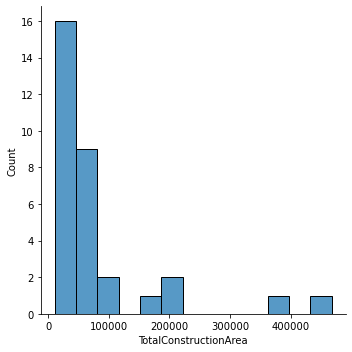

In [ ]:
print('Распределение общей площади территории')
sns.displot(df['TotalConstructionArea'])

In [ ]:
df1 = df.pivot_table(index='OlympiadProfile', values='ID', aggfunc='count').sort_values(by='ID', ascending=False).head()
df1

In [ ]:
print('Топ 5 самых больших технопарков')
df[['TechnoparkName', 'TotalConstructionArea']].sort_values(by = 'TotalConstructionArea', ascending = False).head(5)

Топ 5 самых больших технопарков


,TechnoparkName,TotalConstructionArea
3,Технопарк «Курчатовский институт»,467454.0
20,Технополис «Москва»,379111.0
31,Технопарк «Останкино»,213026.1
21,Технопарк «Сколково»,189666.0
28,Технопарк «РКС»,156239.0


In [ ]:
df['anyfreeplace?'] = df['TotalUnoccupiedArea'].apply(lambda x: "With free place" if x > 0 else "NO free place")

Cколько помещений имеют свободное пространство?


<AxesSubplot:xlabel='anyfreeplace?'>

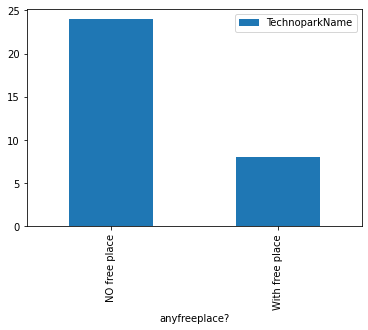

In [ ]:
df2 = df.pivot_table(index='anyfreeplace?', values='TechnoparkName', aggfunc='count')
print("Cколько помещений имеют свободное пространство?")
df2.plot(kind='bar')


In [ ]:
df['anyofficeplace?'] = df['UnoccupiedOfficeArea'].apply(lambda x: "With office place" if x > 0 else "NO office place")

Cколько помещений имеют свободное ОФИСНОЕ пространство?


<AxesSubplot:xlabel='anyofficeplace?'>

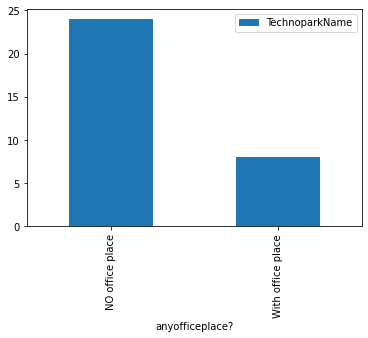

In [ ]:
df3 = df.pivot_table(index='anyofficeplace?', values='TechnoparkName', aggfunc='count')
print("Cколько помещений имеют свободное ОФИСНОЕ пространство?")
df3.plot(kind='bar')


In [ ]:
print('Топ 5 помещений с самым большим свободным офисным простанством')
df[['TechnoparkName', 'UnoccupiedOfficeArea']].sort_values(by = 'UnoccupiedOfficeArea', ascending = False).head(5)

Топ 5 помещений с самым большим свободным офисным простанством


,TechnoparkName,UnoccupiedOfficeArea
9,Технопарк «Отрадное»,2477.4
15,Технопарк «Физтехпарк»,1551.0
31,Технопарк «Останкино»,758.0
19,Технопарк «ЦНИИТМАШ»,700.0
21,Технопарк «Сколково»,305.2


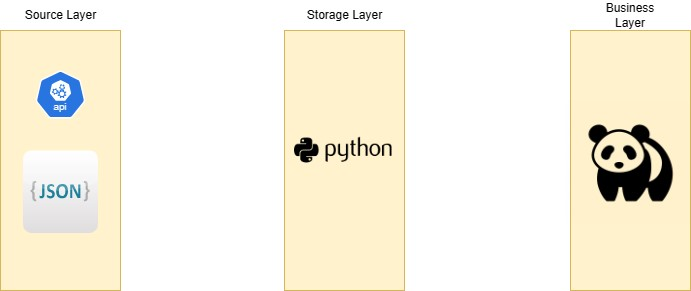

In [1]:
from IPython.display import Image
Image(filename='123.jpg')